<a href="https://colab.research.google.com/github/Uluc/data_science_and_analytics/blob/main/multi_var_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 1
---
**Due Nov. 5 by end of the day.**

Do all your work on this notebook. Submit your homework by uploading the notebook file to moodle. Your submission notebook should contain:

- Code
- Output from running your code (printouts and plots)
- Answer to any questions or any comments (type in a markdown cell)

***

**Task 1**: load the data in the [wines.csv](https://drive.google.com/open?id=1QrQ5Qqr-w4Qx-WPToDHrvFxM9iyS7O1N) data file into a numpy array.
(The following code reads the wines.csv into a Pandas dataframe. Your task is to convert the dataframe to a numpy array.) Your array should contain the data only. The header should be omitted.

In [ ]:
import pandas as pd
import numpy as np
url = 'https://drive.google.com/uc?export=download&id=1QrQ5Qqr-w4Qx-WPToDHrvFxM9iyS7O1N'
df = pd.read_csv(url)
x = df.to_numpy()
print(x)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


**Task 2**: 
- Calculate and print the average quality measure over all the wines
- Find and print the maximum level of residual sugar and minimum level of fixed acidity  


In [ ]:
avg_quality = x[:,-1:].mean()
max_residual_sugar = x[:,3:4].max()
min_fixed_acidity = x[:,:1].min()
print(avg_quality)
print(max_residual_sugar)
print(min_fixed_acidity)

5.6360225140712945
15.5
4.6


**Task 3:**

- Use LinearRegression from sklearn.linear_model to build and train a linear model that predicts the wine 'quality' from the wine 'volatile acidity' value. 

- Use scatter plot to plot the points (x, y) where x is volatile acidity and y is quality. Your linear model represents a line in such x-y space. Plot this line on top of the scatter plot (i.e., having both the scatter plot and the line plot on the same figure).  

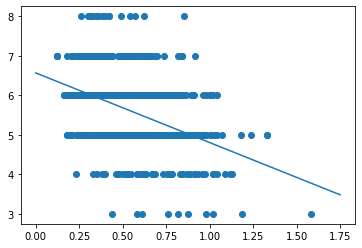

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression(fit_intercept=True)

x_val = x[:, 1:2]
y_val = x[:, -1:]

x_con = np.concatenate(x_val)
y_con = np.concatenate(y_val)

model.fit(x_val, y_con)

xfit = np.linspace(0, 1.75, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit);
plt.scatter(x_con, y_con)


**Task 4:**

- Use LinearRegression to build and train a linear model that predicts the wine 'quality' from all the other wine property values. (Naturally, your model should not use wine 'quality' as an input to predict wine 'quality'. The prediction should be based on all OTHER values.)

- For each wine, make a prediction using your model. You also have the true wine quality value. Calculate the squared error (SE), i.e., squared difference between your prediction and the true value. Average the SE among all wines to obtain the mean squared error (MSE)

- Calculate MSE for the linear model from task 3 that makes prediction using only the 'volatile acidity' value. Compare the MSE between the two models. Which one is better?

In [ ]:
from sklearn.metrics import mean_squared_error

model2 = LinearRegression(fit_intercept=True)

x_val2 = x[:, :-1]
y_val2 = x[:, -1:]

y_con2 = np.concatenate(y_val2)
y_true = y_con2

#print(x_val2.shape, y_con2.shape)

model2.fit(x_val2, y_con2)

#print(model2.intercept_)
#print(model2.coef_)

y_predicted2 = model2.predict(x_val2)
y_dif2 = y_true - y_predicted2
y_dif2 = y_dif2**2
square_error2 = sum(y_dif2)/len(y_dif2)
print("MSE Question 4= ", square_error2)

y_predicted = model.predict(x_val)
y_dif = y_true - y_predicted
y_dif = y_dif**2
square_error = sum(y_dif)/len(y_dif)
print("MSE Question 3= ", square_error)


MSE Question 4=  0.41676716722140805
MSE Question 3=  0.5523439983981253


MSE for the all around model is much better as it has a lower mean square error